In [ ]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split,GridSearchCV,KFold

from sklearn.metrics import accuracy_score

In [2]:
#Importing dataset

strain=pd.read_csv("/content/SalaryData_Train(1).csv")
strain.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
#  Trearing categorical column to numeric

le=LabelEncoder()

strain["workclass"]=le.fit_transform(strain["workclass"])
strain["education"]=le.fit_transform(strain["education"])
strain["maritalstatus"]=le.fit_transform(strain["maritalstatus"])
strain["occupation"]=le.fit_transform(strain["occupation"])
strain["relationship"]=le.fit_transform(strain["relationship"])
strain["race"]=le.fit_transform(strain["race"])
strain["sex"]=le.fit_transform(strain["sex"])
strain["native"]=le.fit_transform(strain["native"])
strain["Salary"]=le.fit_transform(strain["Salary"])

In [4]:
#importing test data
stest=pd.read_csv("/content/SalaryData_Test(1).csv")
stest.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [5]:
# Trearing categorical column to numeric

stest["workclass"]=le.fit_transform(stest["workclass"])
stest["education"]=le.fit_transform(stest["education"])
stest["maritalstatus"]=le.fit_transform(stest["maritalstatus"])
stest["occupation"]=le.fit_transform(stest["occupation"])
stest["relationship"]=le.fit_transform(stest["relationship"])
stest["race"]=le.fit_transform(stest["race"])
stest["sex"]=le.fit_transform(stest["sex"])
stest["native"]=le.fit_transform(stest["native"])
stest["Salary"]=le.fit_transform(stest["Salary"])

In [6]:
#Appending the data

salary=strain.append(stest)
salary

<ipython-input-6-c3e8fb7307a0>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  salary=strain.append(stest)


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


In [7]:
#Cheking the data info

salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45221 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            45221 non-null  int64
 1   workclass      45221 non-null  int64
 2   education      45221 non-null  int64
 3   educationno    45221 non-null  int64
 4   maritalstatus  45221 non-null  int64
 5   occupation     45221 non-null  int64
 6   relationship   45221 non-null  int64
 7   race           45221 non-null  int64
 8   sex            45221 non-null  int64
 9   capitalgain    45221 non-null  int64
 10  capitalloss    45221 non-null  int64
 11  hoursperweek   45221 non-null  int64
 12  native         45221 non-null  int64
 13  Salary         45221 non-null  int64
dtypes: int64(14)
memory usage: 5.2 MB


In [8]:
# Removing the duplicates

Salary=salary.drop_duplicates()
Salary

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15054,48,1,12,14,0,7,1,4,1,0,0,40,37,0
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


In [9]:
# Cheking null values
Salary.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

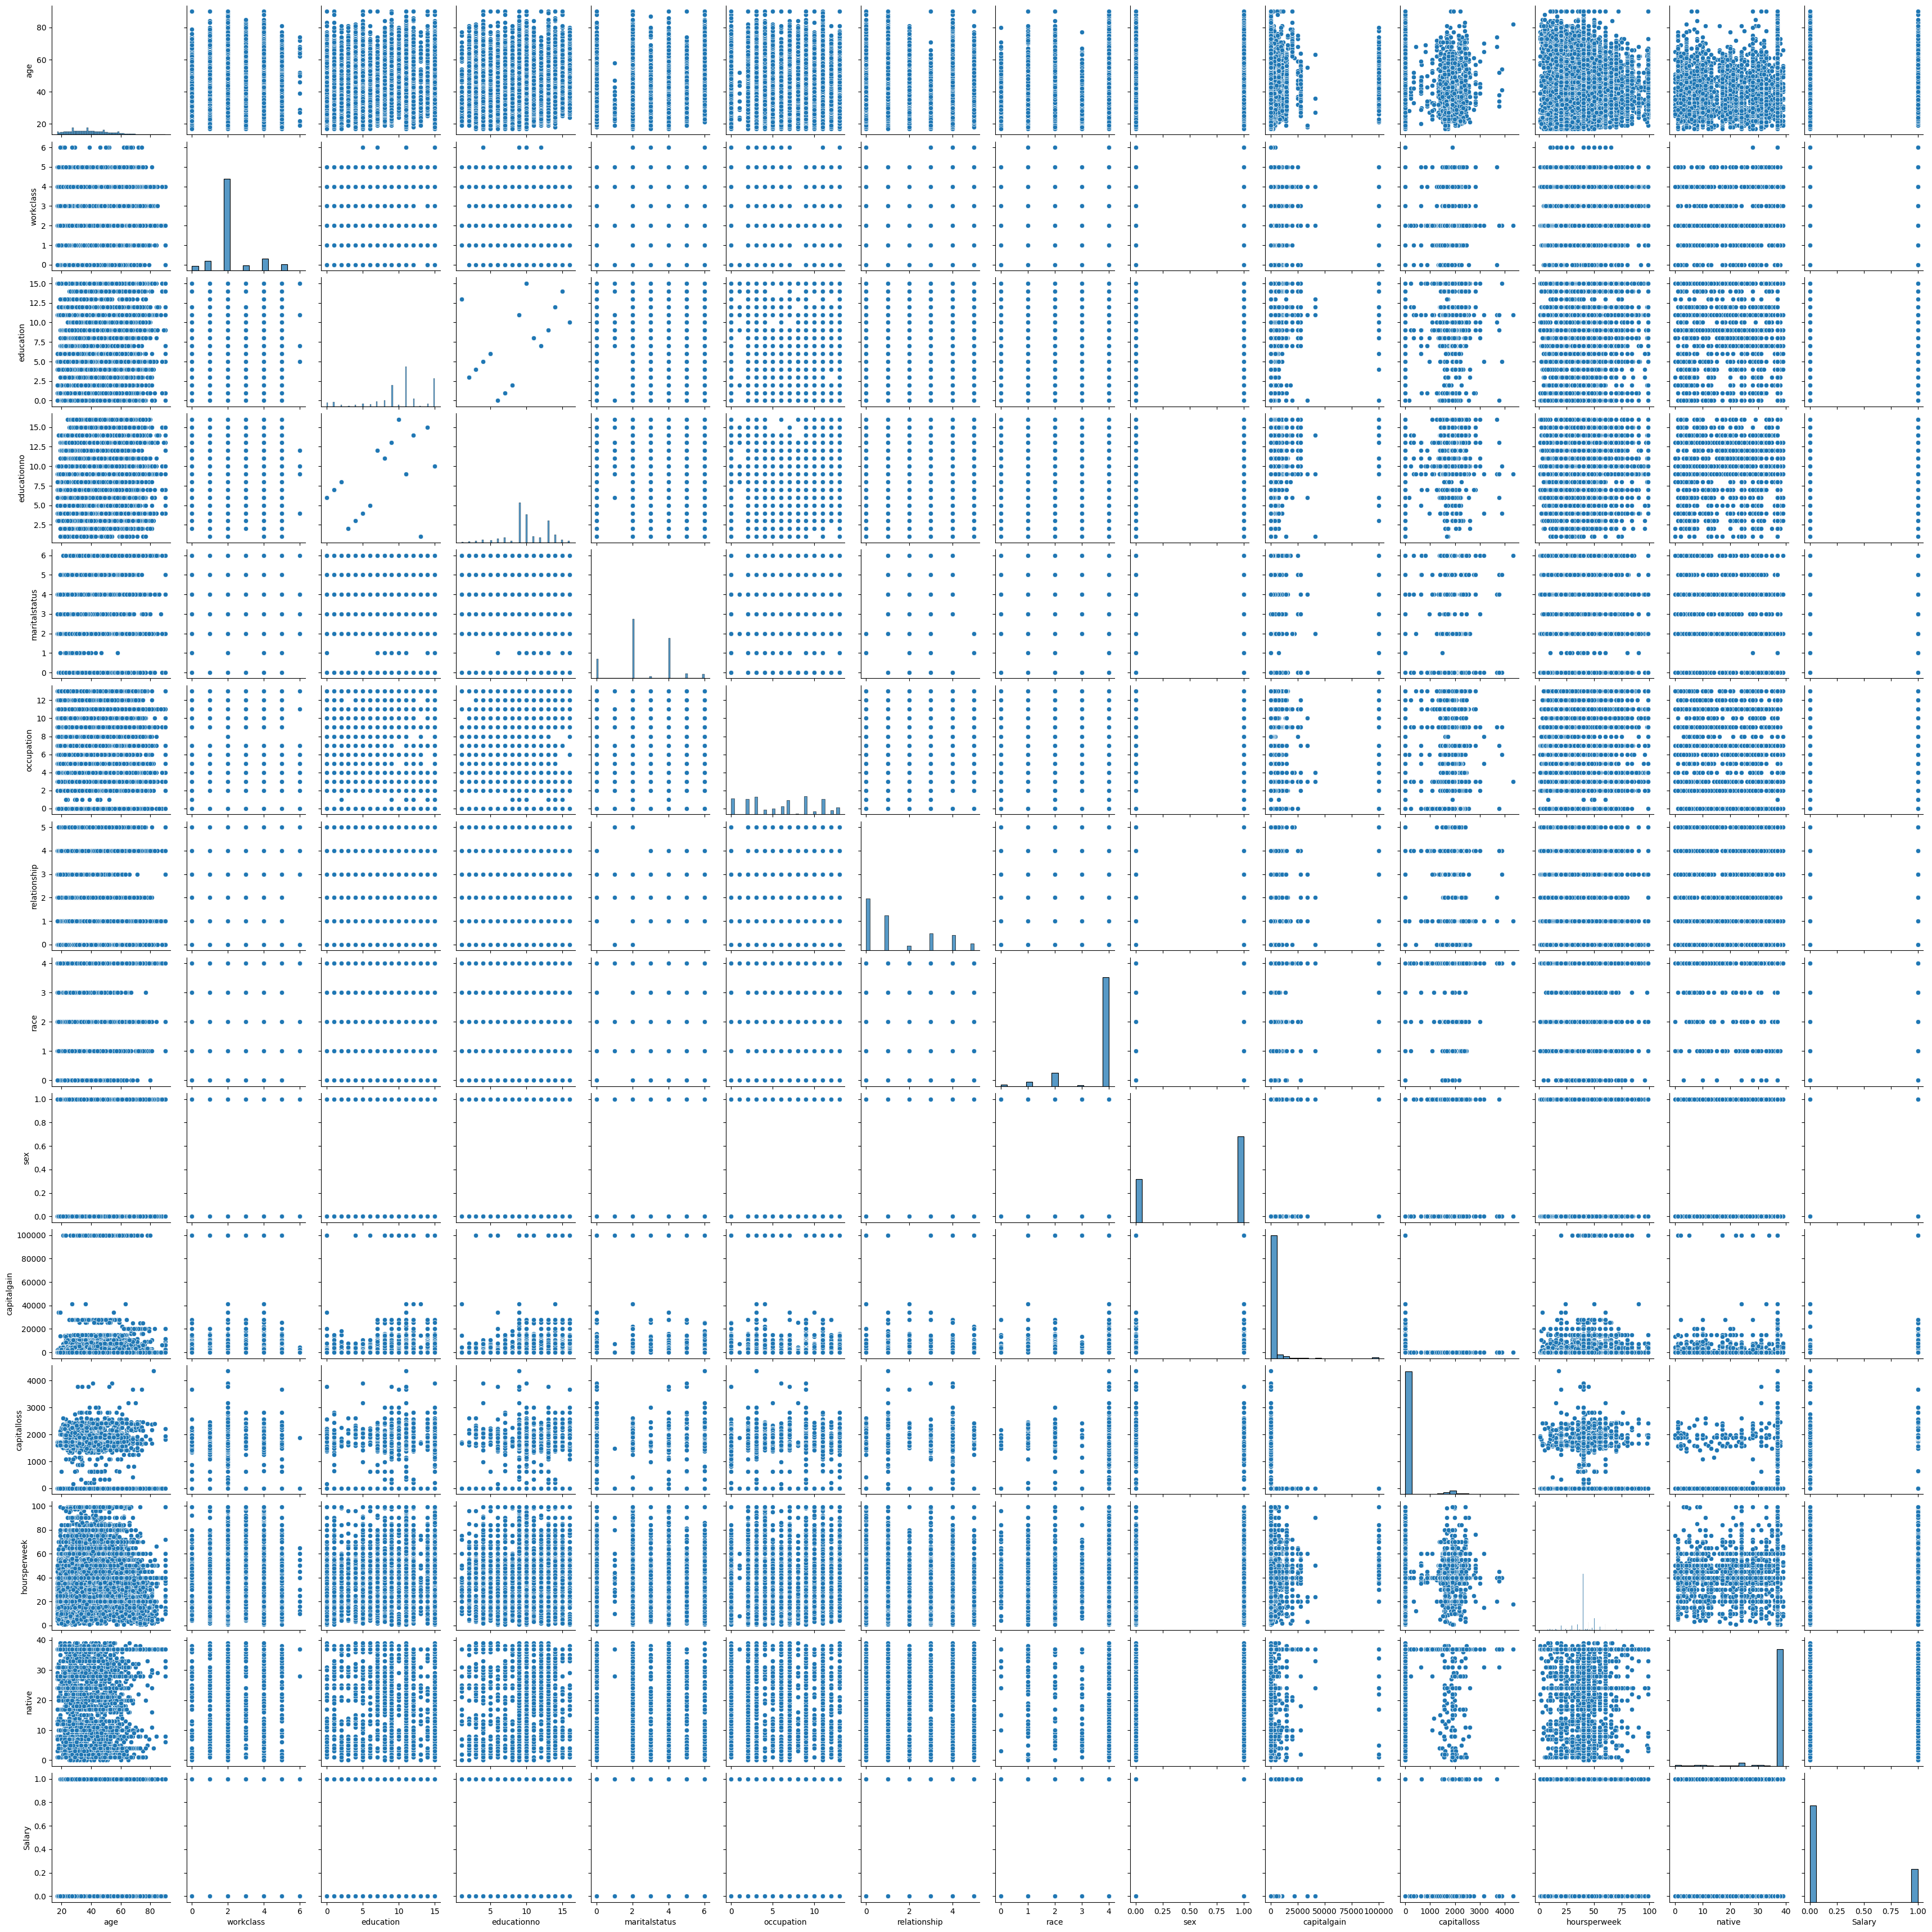

In [11]:
sns.pairplot(Salary)

In [12]:
# Spliting data in to x and y
x=Salary.iloc[:,0:13]
y=Salary.iloc[:,-1]

In [13]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

**Building svc model with kernel-poly to check the accuracy**

In [ ]:
svc=SVC(kernel="poly")
svc.fit(xtrain,ytrain)

pred=svc.predict(xtest)
acc=accuracy_score(pred,ytest)
print(acc)

0.763846415222562


**Building svc model with kernel-rbr to check the accuracy**

In [ ]:
svc1=SVC(kernel="rbf")
svc1.fit(xtrain,ytrain)
pred1=svc1.predict(xtest)

acc1=accuracy_score(pred1,ytest)
print(acc1)

0.7902650356778798


**Building svc model with kernel-sigmoid to check the accuracy**

In [ ]:
svc2=SVC(kernel="sigmoid")
svc2.fit(xtrain,ytrain)
pred2=svc2.predict(xtest)

acc2=accuracy_score(pred2,ytest)
print(acc2)

0.7434590553856609


***After carrying the model over three kernel we can claim that kernel-rbf gives a max accuracy amogst all.***